# JULIO CESAR ZAMPIERI RM98772
# JOÃO GABRIEL DE DIAS MELLO NASCIMENTO RM99092
# GUILHERME ALVES DE LIMA RM550433

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## PREPARAR OS DADOS PARA ISSO SERÁ UTILIZADO UM DATAFRAME DO KAGGLE A RESPEITO DE DOENÇA NO CORAÇÃO

In [ ]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_disease["age"].plot.hist(bins=10);

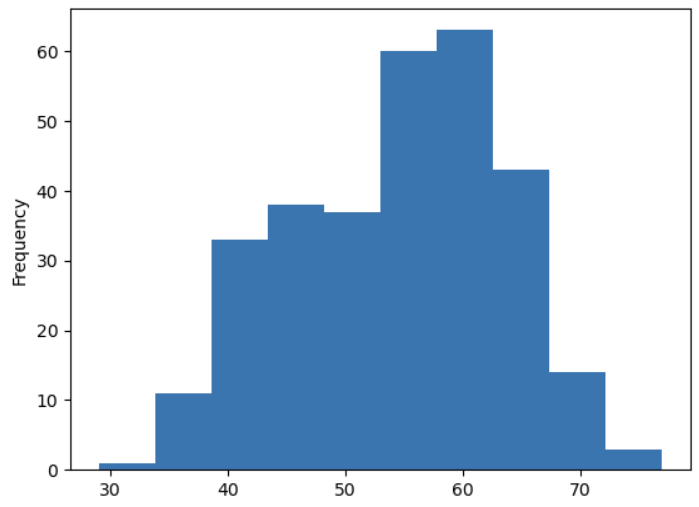

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
fig, (ax0, ax1) = plt.subplots(nrows=2,
                                ncols=1,
                                figsize=(10,10),
                                sharex=True)

# ------------------------------------------------------
ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter");

ax0.set(title="Heart Disease and Cholestetol levels",
      ylabel="Cholesterol");

ax0.legend(*scatter.legend_elements(), title="Target");

ax0.axhline(over_50["chol"].mean(),
          linestyle="--");
#----------------------------------------------------------
scatter1 = ax1.scatter(x=over_50["age"],
                    y=over_50["thalach"],
                    c=over_50["target"],
                    cmap="winter");

ax1.set(title="Heart Disease and Max Heart Rate",
      xlabel="Age",
      ylabel="Max Heart Rate");

ax1.legend(*scatter.legend_elements(), title="Target");

ax1.axhline(over_50["thalach"].mean(),
          linestyle=("--"));

# ---------------------------------------------------------------
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")


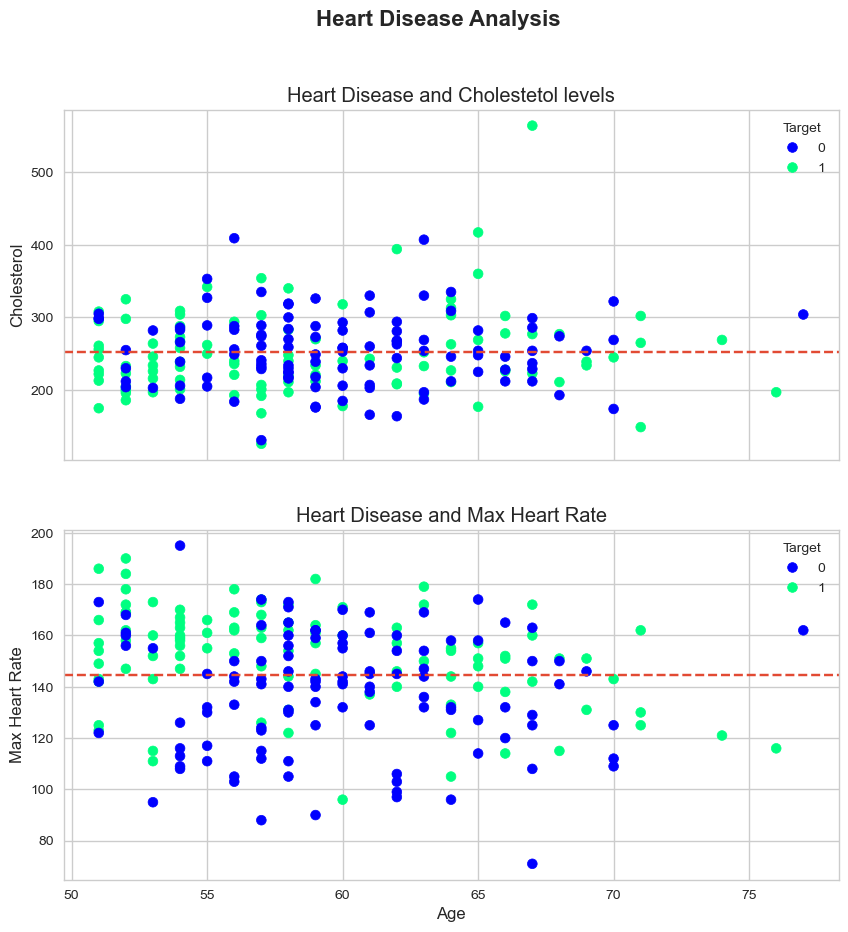

In [ ]:
x = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

## SELECIONAR E IMPORTAR UM MODELO DE CLASSIFICAÇÃO, UTILIZAREMOS O RANDOM FOREST PARA AMBOS, CLASSIFICACAO E REGRESSAO, POREM AGORA SERÁ O EXEMPLO DE CLASSIFICAÇÃO, TENDO EM VISTA QUE PRETENDEMOS PREVER VALORES CATEGÓRICOS E NÃO NÚMERICOS, OU VALORES BOOLEANOS (NO EXEMPLO ATUAL)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# SEPARANDO O TRAIN TEST SPLIT COM 70% DE TREINAMENTO E 30% DE TESTE

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
clf.fit(x_train, y_train);

## GERAR UMA PREDIÇÃO

In [ ]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [9]:
y_test

123    1
269    0
44     1
133    1
194    0
      ..
142    1
155    1
164    1
215    0
153    1
Name: target, Length: 61, dtype: int64

## TESTAR O MODELO

In [ ]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8688524590163934

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.87      0.92      0.89        37

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[19,  5],
       [ 3, 34]], dtype=int64)

In [14]:
accuracy_score(y_test, y_preds)

0.8688524590163934

## MELHORAR O MODELO

In [ ]:
np.random.seed(32)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on the test set {clf.score(x_test, y_test) * 100:.2f}%\n")

Trying model with 10 estimators...
Model accuracy on the test set 77.05%

Trying model with 20 estimators...
Model accuracy on the test set 83.61%

Trying model with 30 estimators...
Model accuracy on the test set 85.25%

Trying model with 40 estimators...
Model accuracy on the test set 83.61%

Trying model with 50 estimators...
Model accuracy on the test set 86.89%

Trying model with 60 estimators...
Model accuracy on the test set 86.89%

Trying model with 70 estimators...
Model accuracy on the test set 83.61%

Trying model with 80 estimators...
Model accuracy on the test set 83.61%

Trying model with 90 estimators...
Model accuracy on the test set 85.25%



## IMPORTANDO UM DATA SET DE VENDA DE CARROS PARA TRABALHAR COM REGRESSÃO

In [26]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [ ]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

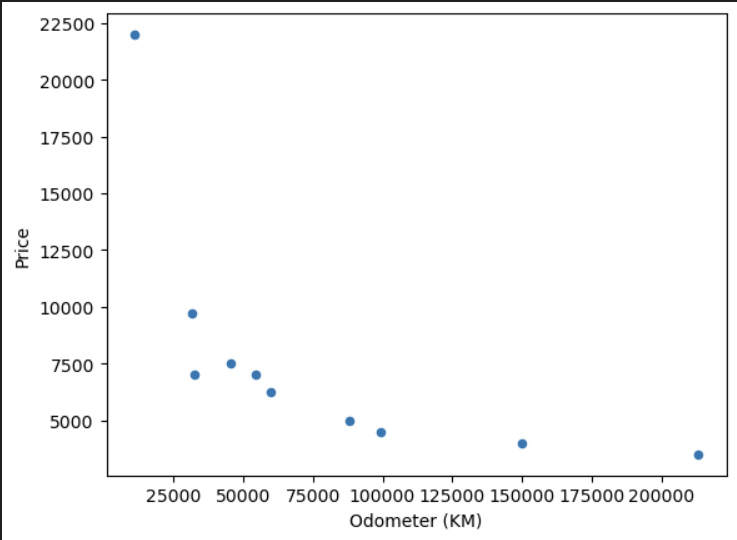

In [ ]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar")

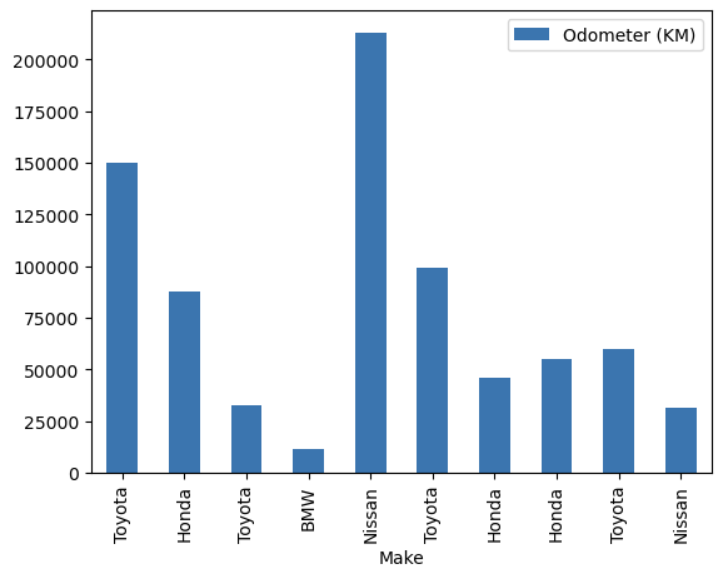

In [ ]:
car_sales["Odometer (KM)"].plot.hist();

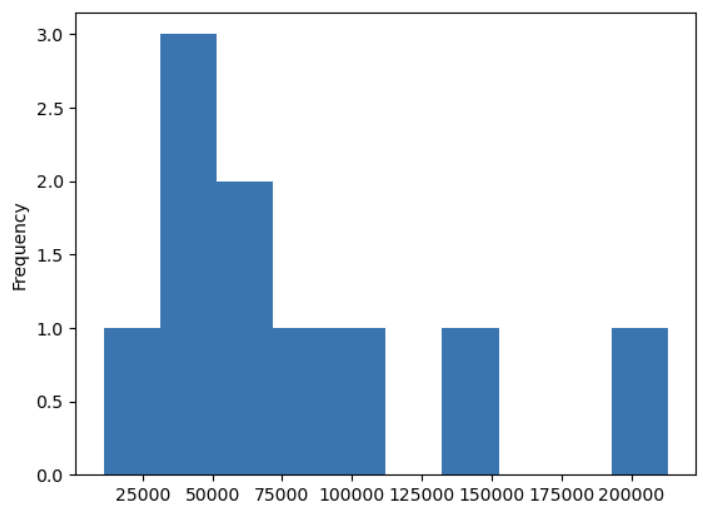

## TRANSFORMANDO OS VALORES CATEGORIOCS EM NUMERICOS

In [ ]:
=from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [31]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


## TREINANDO O MODELO COM RANDOM FOREST REGRESSOR E SEPARANDO EM 70% 30% O TRAIN TEST SPLIT

In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(12)


x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.19797644928196145